# Problem 2

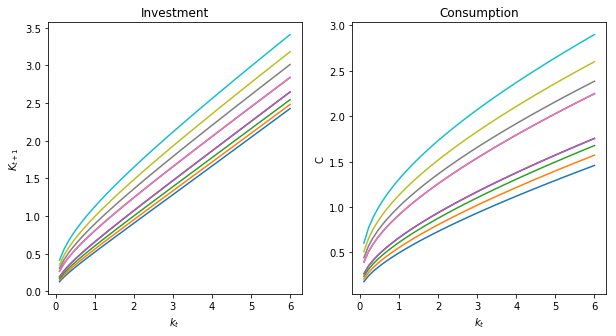

In [1]:
import numpy as np
from scipy.optimize import  root as eqsolver
from scipy import interpolate

beta=.99
nbk,nba=50,10
crit,epsi=1,1e-6

### State space

Kmin=.1
Kmax=6
Kgrid=np.linspace(Kmin,Kmax,nbk)


import discret
rho,mu,sigma=.9,0,.1


w = 0.5 + rho/4
sigmaZ = sigma/np.sqrt(1-rho**2)

baseSigma = w*sigma +(1-w)*sigmaZ
[A,P]=discret.tauchenhussey(nba,mu,rho,sigma, baseSigma)
    

def PL(x,Kgrid,Kp):
    t= interpolate.interp1d(Kgrid,Kp,fill_value="extrapolate")
    return t(x)

f= lambda x,a,A:  np.exp(A[0,a])*np.power(x,.3)+.5*x
f_p=lambda x,a,A:  np.exp(A[0,a])*.3*np.power(x,-.7)+.5

u_p= lambda y: 1./y    

#u_p= lambda y: 4*np.power(y,-5)

def g(f,f_p,u_p,PL,Kgrid,Kp,x,j,l,A):
    aa=np.shape(Kp)
    exp=np.zeros(aa[1])
    for i in range(aa[1]):
        exp[i]=f_p(x,i,A)*u_p(f(x,i,A)-PL(x,Kgrid,Kp[:,i]))
    expect=exp@P[l,:]
    V=u_p(f(Kgrid[j],l,A)-x)-beta*expect
    return V

crit,itera=1,0
Kp=Kmin*np.ones([nbk,nba])

while crit>epsi:
    Kp_new=np.zeros([nbk,nba])
    R=np.zeros([nbk,nba])
    for j in range(nbk):
        for l in range(nba):
            obj_1=lambda x: g(f,f_p,u_p,PL,Kgrid,Kp,x,j,l,A)
            Kp_new[j,l]=eqsolver(obj_1,Kp[j,l]).x
            R[j,l]=obj_1(Kp_new[j,l])
    crit=np.max(np.abs(Kp_new-Kp))
    Kp=Kp_new*1.
    itera=itera+1

C=np.zeros([nbk,nba])
for i in range(nbk):    
    for j in range(nba):
        C[i,j]=f(Kgrid[i],j,A)-Kp_new[i,j]
            
from matplotlib import pyplot as plt        

for i in range(nba):
    plt.figure(1,figsize=(10, 5))
    plt.subplot(121)
    plt.plot(Kgrid,Kp_new[:,i]) 
    plt.xlabel(r'$k_t$')
    plt.ylabel(r'$K_{t+1}$')
    plt.title('Investment')

    plt.subplot(122)
    plt.plot(Kgrid,C[:,i]) 
    plt.xlabel(r'$k_t$')
    plt.ylabel('C')
    plt.title('Consumption')
            
        
plt.show()        